# Reshaping the ResStock outputs to DR-path inputs
NOTE: have to run this from the Windows side in order to access Google Drive


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from utils.column_mapping import map_columns

In [2]:
indir = r'G:\\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\ResStock\ResStock_update_20200617'
indir2 = r'G:\Shared drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\ComStock\FullData(12 07 2020 from Andrew)\Materials_for_DRPath_Inputs_generation'
outdir = r"C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock"
run='ResStockFullRun20200617'
grossloadfile = os.path.join('Grossload','Gross_load_{s}_scenario_0_VS_1_2016.csv')
wyear = '2016AMY'
year=2016
upgrade_map={0:'baseline',
             1:'equipment_only',
             2:'controls_only',
             3:'envelope_only',
             4:'envelope_plus_controls',
             5:'envelope_plus_controls_plus_equipment'}

In [3]:
region='ERCT'
region_state_map = {'CAMX':'CA', 'ERCT':'TX', 'NENG':'NE'}
region_selector={
        'CAMX':['CA', 'NV'],
        'ERCT':['TX', 'LA', 'AZ'],
        'NENG':['CT','RI','MA','VT','NH','ME','NY']
    }
state = region_state_map[region]
states = region_selector[region]
sf = pd.read_csv(os.path.join(indir2,'scalingfactor','ScalingFactor(FullRun_ResStock_Data)_{r}_2016.csv'.format(
                                r=state)))
sf.loc[sf['epw'].str.slice(4,6).isin(states)].head(20)

epw  \
60   USA_LA_Shreveport.Regional.722480_2016.epw   
61   USA_LA_Shreveport.Regional.722480_2016.epw   
62   USA_LA_Shreveport.Regional.722480_2016.epw   
63   USA_LA_Shreveport.Regional.722480_2016.epw   
64   USA_LA_Shreveport.Regional.722480_2016.epw   
105    USA_TX_Abilene.Municipal.722660_2016.epw   
106    USA_TX_Abilene.Municipal.722660_2016.epw   
107    USA_TX_Abilene.Municipal.722660_2016.epw   
108    USA_TX_Abilene.Municipal.722660_2016.epw   
109    USA_TX_Abilene.Municipal.722660_2016.epw   
110        USA_TX_Amarillo.Intl.723630_2016.epw   
111        USA_TX_Amarillo.Intl.723630_2016.epw   
112        USA_TX_Amarillo.Intl.723630_2016.epw   
113        USA_TX_Amarillo.Intl.723630_2016.epw   
114        USA_TX_Amarillo.Intl.723630_2016.epw   
115          USA_TX_Angelina.Co.722446_2016.epw   
116          USA_TX_Angelina.Co.722446_2016.epw   
117          USA_TX_Angelina.Co.722446_2016.epw   
118          USA_TX_Angelina.Co.722446_2016.epw   
119          USA_TX_Angelina.Co.722446_2016.epw   

                         unit_type  upgrade  Scale_UsableRatio  \
60                     Mobile Home        0           1.005985   
61   Multi-Family with 2 - 4 Units        0           1.005985   
62      Multi-Family with 5+ Units        0           1.005985   
63          Single-Family Attached        0           1.005985   
64          Single-Family Detached        0           1.005985   
105                    Mobile Home        0           1.005985   
106  Multi-Family with 2 - 4 Units        0           1.005985   
107     Multi-Family with 5+ Units        0           1.005985   
108         Single-Family Attached        0           1.005985   
109         Single-Family Detached        0           1.005985   
110                    Mobile Home        0           1.005985   
111  Multi-Family with 2 - 4 Units        0           1.005985   
112     Multi-Family with 5+ Units        0           1.005985   
113         Single-Family Attached        0           1.005985   
114         Single-Family Detached        0           1.005985   
115                    Mobile Home        0           1.005985   
116  Multi-Family with 2 - 4 Units        0           1.005985   
117     Multi-Family with 5+ Units        0           1.005985   
118         Single-Family Attached        0           1.005985   
119         Single-Family Detached        0           1.005985   

     Scale_BuildingTot_area  Units_count  Scale_EIARefer  
60             18124.481767        19734        0.854301  
61              1785.993559         1785        0.854301  
62              2979.213432         2979        0.854301  
63                94.644409           94        0.854301  
64             93693.666279        90111        0.854301  
105             9766.561858         9673        0.854301  
106             4679.871432         4679        0.854301  
107            14138.358360        14138        0.854301  
108               11.890000           11        0.854301  
109            82004.560702        78922        0.854301  
110             3628.502018         3028        0.854301  
111             1481.282347         1481        0.854301  
112             2848.264493         2848        0.854301  
113                0.000000            0        0.854301  
114            27754.485828        28141        0.854301  
115             2933.054507         3480        0.854301  
116             1224.944270         1224        0.854301  
117             2545.835478         2545        0.854301  
118                0.000000            0        0.854301  
119            22096.545162        20584        0.854301

In [4]:
summ_all = pd.read_csv(os.path.join(indir,'brief_summary.csv'))
summ_all.loc[summ_all['weather_station'].str.slice(4,6).isin(states)]

weather_station  \
238  USA_LA_Shreveport.Regional.722480_2016.epw   
239  USA_LA_Shreveport.Regional.722480_2016.epw   
240  USA_LA_Shreveport.Regional.722480_2016.epw   
241  USA_LA_Shreveport.Regional.722480_2016.epw   
242  USA_LA_Shreveport.Regional.722480_2016.epw   
..                                          ...   
689  USA_TX_Wichita.Falls.Sheps.723510_2016.epw   
690  USA_TX_Wichita.Falls.Sheps.723510_2016.epw   
691  USA_TX_Wichita.Falls.Sheps.723510_2016.epw   
692  USA_TX_Wichita.Falls.Sheps.723510_2016.epw   
693  USA_TX_Wichita.Falls.Sheps.723510_2016.epw   

                     building_type       size  num_buildings  num_units  \
238                    Mobile Home     0-1499            282      282.0   
239                    Mobile Home  1500-2499            137      137.0   
240                    Mobile Home  2500-3499             24       24.0   
241                    Mobile Home      3500+             21       21.0   
242  Multi-Family with 2 - 4 Units     0-1499            120      344.0   
..                             ...        ...            ...        ...   
689         Single-Family Attached      3500+              1       12.0   
690         Single-Family Detached     0-1499            291      291.0   
691         Single-Family Detached  1500-2499            324      324.0   
692         Single-Family Detached  2500-3499             99       99.0   
693         Single-Family Detached      3500+             46       46.0   

     num_with_ac  num_with_er_heat  num_with_hp  num_with_dishwasher  \
238          278               152           69                  282   
239          134                76           36                  137   
240           24                12            7                   24   
241           21                12            7                   21   
242          117                65           25                  120   
..           ...               ...          ...                  ...   
689            1                 0            1                    1   
690          276                78           40                  291   
691          310                94           45                  324   
692           92                28           16                   99   
693           43                18           10                   46   

     num_with_clothes_washer  num_with_elec_clothes_dryer  \
238                      282                          247   
239                      137                          122   
240                       24                           22   
241                       21                           21   
242                      120                          104   
..                       ...                          ...   
689                        1                            1   
690                      291                          250   
691                      324                          272   
692                       99                           83   
693                       46                           38   

     num_with_elec_cooking  num_with_elec_water_heater  num_with_pool_pump  \
238                    218                         228                 282   
239                    105                         101                 137   
240                     22                          18                  24   
241                     19                          17                  21   
242                     93                          87                 120   
..                     ...                         ...                 ...   
689                      1                           1                   1   
690                    186                         143                 291   
691                    226                         168                 324   
692                     64                          49                  99   
693                     28                          22        

In [5]:

summ = summ_all.groupby(
    ['weather_station', 'building_type']).agg(
    {'num_buildings':sum,
     'num_units':sum,
     'num_with_ac':sum,
     'num_with_er_heat':sum,
     'num_with_hp':sum,
     'num_with_clothes_washer':sum,
     'num_with_elec_clothes_dryer':sum,
     'num_with_elec_water_heater':sum,
     'num_with_elec_cooking':sum,
     'num_with_dishwasher':sum,
     'num_with_pool_pump':sum}
    ).reset_index()
summ['hvac_penetration'] = summ['num_with_ac']/summ['num_buildings']
summ['heating_penetration'] = (summ['num_with_er_heat']+summ['num_with_hp'])/summ['num_buildings']
summ['clothes_washer_penetration'] = summ['num_with_clothes_washer']/summ['num_buildings']
summ['clothes_dryer_penetration'] = summ['num_with_elec_clothes_dryer']/summ['num_buildings']
summ['water_heating_penetration'] = summ['num_with_elec_water_heater']/summ['num_buildings']
summ['cooking_penetration'] = summ['num_with_elec_cooking']/summ['num_buildings']
summ['dishwasher_penetration'] = summ['num_with_dishwasher']/summ['num_buildings']
summ['pool_pump_penetration'] = 0.075#summ['num_with_pool_pump']/summ['num_buildings'] #Fixed assumption to fix ResStock bug.
summ.loc[summ['weather_station'].str.slice(4,6).isin(states)].head()

weather_station                  building_type  \
60  USA_LA_Shreveport.Regional.722480_2016.epw                    Mobile Home   
61  USA_LA_Shreveport.Regional.722480_2016.epw  Multi-Family with 2 - 4 Units   
62  USA_LA_Shreveport.Regional.722480_2016.epw     Multi-Family with 5+ Units   
63  USA_LA_Shreveport.Regional.722480_2016.epw         Single-Family Attached   
64  USA_LA_Shreveport.Regional.722480_2016.epw         Single-Family Detached   

    num_buildings  num_units  num_with_ac  num_with_er_heat  num_with_hp  \
60            464      464.0          457               252          119   
61            171      489.0          167                88           40   
62            162     2718.0          158               101           34   
63             49      742.0           48                25            9   
64           1925     1925.0         1871               595          330   

    num_with_clothes_washer  num_with_elec_clothes_dryer  \
60                      464                          412   
61                      171                          150   
62                      162                          143   
63                       49                           45   
64                     1925                         1641   

    num_with_elec_water_heater  ...  num_with_dishwasher  num_with_pool_pump  \
60                         364  ...                  464                 464   
61                         124  ...                  171                 171   
62                         134  ...                  162                 162   
63                          32  ...                   49                  49   
64                         999  ...                 1925                1925   

    hvac_penetration  heating_penetration  clothes_washer_penetration  \
60          0.984914             0.799569                         1.0   
61          0.976608             0.748538                         1.0   
62          0.975309             0.833333                         1.0   
63          0.979592             0.693878                         1.0   
64          0.971948             0.480519                         1.0   

    clothes_dryer_penetration  water_heating_penetration  cooking_penetration  \
60                   0.887931                   0.784483             0.784483   
61                   0.877193                   0.725146             0.760234   
62                   0.882716                   0.827160             0.790123   
63                   0.918367                   0.653061             0.755102   
64                   0.852468                   0.518961             0.675325   

    dishwasher_penetration  pool_pump_penetration  
60                     1.0                  0.075  
61                     1.0                  0.075  
62                     1.0                  0.075  
63                     1.0                  0.075  
64                     1.0                  0.075  

[5 rows x 21 columns]

In [6]:
sf = sf.merge(summ, left_on=['epw','unit_type'], right_on=['weather_station', 'building_type'])
sf.loc[sf['epw'].str.slice(4,6).isin(states)].head()

epw                      unit_type  \
60  USA_LA_Shreveport.Regional.722480_2016.epw                    Mobile Home   
61  USA_LA_Shreveport.Regional.722480_2016.epw  Multi-Family with 2 - 4 Units   
62  USA_LA_Shreveport.Regional.722480_2016.epw     Multi-Family with 5+ Units   
63  USA_LA_Shreveport.Regional.722480_2016.epw         Single-Family Attached   
64  USA_LA_Shreveport.Regional.722480_2016.epw         Single-Family Detached   

    upgrade  Scale_UsableRatio  Scale_BuildingTot_area  Units_count  \
60        0           1.005985            18124.481767        19734   
61        0           1.005985             1785.993559         1785   
62        0           1.005985             2979.213432         2979   
63        0           1.005985               94.644409           94   
64        0           1.005985            93693.666279        90111   

    Scale_EIARefer                             weather_station  \
60        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   
61        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   
62        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   
63        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   
64        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   

                    building_type  num_buildings  ...  num_with_dishwasher  \
60                    Mobile Home            464  ...                  464   
61  Multi-Family with 2 - 4 Units            171  ...                  171   
62     Multi-Family with 5+ Units            162  ...                  162   
63         Single-Family Attached             49  ...                   49   
64         Single-Family Detached           1925  ...                 1925   

    num_with_pool_pump  hvac_penetration  heating_penetration  \
60                 464          0.984914             0.799569   
61                 171          0.976608             0.748538   
62                 162          0.975309             0.833333   
63                  49          0.979592             0.693878   
64                1925          0.971948             0.480519   

    clothes_washer_penetration  clothes_dryer_penetration  \
60                         1.0                   0.887931   
61                         1.0                   0.877193   
62                         1.0                   0.882716   
63                         1.0                   0.918367   
64                         1.0                   0.852468   

    water_heating_penetration  cooking_penetration  dishwasher_penetration  \
60                   0.784483             0.784483                     1.0   
61                   0.725146             0.760234                     1.0   
62                   0.827160             0.790123                     1.0   
63                   0.653061             0.755102                     1.0   
64                   0.518961             0.675325                     1.0   

    pool_pump_penetration  
60                  0.075  
61                  0.075  
62                  0.075  
63                  0.075  
64                  0.075  

[5 rows x 28 columns]

In [7]:
col_map = pd.read_csv(os.path.join(indir, '../drpath column mapping.csv'))
col_map.head()

ResStock Output  DR-Path inputs    Display name  \
0  Clothes_Dryer_Electric   clothes_dryer   Clothes Dryer   
1          Clothes_Washer  clothes_washer  Clothes Washer   
2                 Cooling         cooling         Cooling   
3  Central_System_Cooling         cooling         Cooling   
4           Cooling_Pumps         cooling         Cooling   

  Aggregated display name  
0              Appliances  
1              Appliances  
2                 Cooling  
3                 Cooling  
4                 Cooling

In [8]:
sf['factor'] = sf['Scale_UsableRatio']*sf['Scale_BuildingTot_area']*sf['Scale_EIARefer']
sf.loc[sf['epw'].str.slice(4,6).isin(states)].head()

epw                      unit_type  \
60  USA_LA_Shreveport.Regional.722480_2016.epw                    Mobile Home   
61  USA_LA_Shreveport.Regional.722480_2016.epw  Multi-Family with 2 - 4 Units   
62  USA_LA_Shreveport.Regional.722480_2016.epw     Multi-Family with 5+ Units   
63  USA_LA_Shreveport.Regional.722480_2016.epw         Single-Family Attached   
64  USA_LA_Shreveport.Regional.722480_2016.epw         Single-Family Detached   

    upgrade  Scale_UsableRatio  Scale_BuildingTot_area  Units_count  \
60        0           1.005985            18124.481767        19734   
61        0           1.005985             1785.993559         1785   
62        0           1.005985             2979.213432         2979   
63        0           1.005985               94.644409           94   
64        0           1.005985            93693.666279        90111   

    Scale_EIARefer                             weather_station  \
60        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   
61        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   
62        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   
63        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   
64        0.854301  USA_LA_Shreveport.Regional.722480_2016.epw   

                    building_type  num_buildings  ...  num_with_pool_pump  \
60                    Mobile Home            464  ...                 464   
61  Multi-Family with 2 - 4 Units            171  ...                 171   
62     Multi-Family with 5+ Units            162  ...                 162   
63         Single-Family Attached             49  ...                  49   
64         Single-Family Detached           1925  ...                1925   

    hvac_penetration  heating_penetration  clothes_washer_penetration  \
60          0.984914             0.799569                         1.0   
61          0.976608             0.748538                         1.0   
62          0.975309             0.833333                         1.0   
63          0.979592             0.693878                         1.0   
64          0.971948             0.480519                         1.0   

    clothes_dryer_penetration  water_heating_penetration  cooking_penetration  \
60                   0.887931                   0.784483             0.784483   
61                   0.877193                   0.725146             0.760234   
62                   0.882716                   0.827160             0.790123   
63                   0.918367                   0.653061             0.755102   
64                   0.852468                   0.518961             0.675325   

    dishwasher_penetration  pool_pump_penetration        factor  
60                     1.0                  0.075  15576.421402  
61                     1.0                  0.075   1534.906689  
62                     1.0                  0.075   2560.375764  
63                     1.0                  0.075     81.338668  
64                     1.0                  0.075  80521.586625  

[5 rows x 29 columns]

In [9]:
write=True
baseline_totals = pd.DataFrame(np.zeros(8760), columns=['scaled'])
for u in range(6):
    upgrade=str(u)
    print('Start upgrade '+upgrade)
    cluster_summ = pd.DataFrame()

    #full_outdir = os.path.join(outdir, region, 'cluster_profiles', 
    #                           '_'.join([run,wyear,'BaseDemand','upgrade'+upgrade,str(year)]))
    
    full_outdir = os.path.join(outdir, region, 'cluster_profiles', 
                               '_'.join(['ResStockComStock',wyear,'BaseDemand',
                                         upgrade_map[u].replace('_'," ").title().replace(' ',''),str(year)]))
    if write:
        try:
            os.mkdir(full_outdir)
            print('Directory '+full_outdir+' created.')
        except FileExistsError:
            print('Directory '+full_outdir+' already exists.')

    
    print('Residential Clusters...')
    for i,r in sf.iterrows():
        if (r['epw'][4:6] not in states):
            continue
        if (r['factor']<=0):
            continue
        clustername = '-'.join([r['epw'][:-4], r['unit_type'].replace(' ','_')+'_0'])
        infilename = clustername+'-upgrade_'+upgrade+'.csv'
        #print(infilename, r['factor'])
        
        data = pd.read_csv(os.path.join(indir,'building_load_shapes',infilename),
                           index_col=0).loc[:8759]
        assert len(data)==8760
        
        #Correct pool pump data:
        #(note: this applies only to the 2016AMY run, to correct a bug in that 
        # version of ResStock that gave everyone a pool.)
        data['Building_Electricity'] -= data['Pool_Pump']*(1-0.075)
        data['Pool_Pump'] *= 0.075

        #Cluster metadata
        cluster_summ.loc[i, 'name'] = clustername
        cluster_summ.loc[i, 'kwh_ann_tot'] = data['Building_Electricity'].sum()*r['factor']
        cluster_summ.loc[i, 'customer_count'] = r['Units_count']
        cluster_summ.loc[i, 'cooling_count'] = r['Units_count']*r['hvac_penetration']
        cluster_summ.loc[i, 'heating_count'] = r['Units_count']*r['heating_penetration']
        cluster_summ.loc[i, 'water_heating_count'] = r['Units_count']*r['water_heating_penetration']
        cluster_summ.loc[i, 'cooking_count'] = r['Units_count']*r['cooking_penetration']
        cluster_summ.loc[i, 'clothes_washer_count'] = r['Units_count']*r['clothes_washer_penetration']
        cluster_summ.loc[i, 'clothes_dryer_count'] = r['Units_count']*r['clothes_dryer_penetration']
        cluster_summ.loc[i, 'dishwasher_count'] = r['Units_count']*r['dishwasher_penetration']
        cluster_summ.loc[i, 'pool_pump_count'] = r['Units_count']*r['pool_pump_penetration']
        cluster_summ.loc[i, 'region'] = r['epw'][:-16]
        cluster_summ.loc[i, 'building_type'] = r['unit_type']
        cluster_summ.loc[i, 'rate_category'] = 'nonCare'
        cluster_summ.loc[i, 'kwh_bin'] = '0.0_1.0'
        cluster_summ.loc[i, 'kw_bin'] = 'any'
        cluster_summ.loc[i, 'hvac_penetration'] = r['hvac_penetration']
        cluster_summ.loc[i, 'weather_station'] = clustername.split('-')[0][:-5].split('.')[-1]

        drpi = map_columns(data, col_map)*r['factor']

        if write:
            drpi.to_csv(os.path.join(full_outdir, clustername+'.csv'),
                       index=False)   
        if u==0:
            baseline_totals['scaled'] += drpi['total']


    cluster_summ['sector'] = 'res'
    print("Done")
    print('Com and other...')
    #Commercial load
    
    gross = pd.read_csv(os.path.join(indir2,
                                     grossloadfile.format(
                                        s=region_state_map[region]))).loc[:8759]
    assert(len(gross.index)==8760)
    com_load = pd.DataFrame()
    com_load['hour_ending'] = range(1,8761)
    com_load['other'] = gross['scaled_com_kwh']
    com_load['total'] = gross['scaled_com_kwh']

    if write:
        com_load.to_csv(os.path.join(full_outdir, 'com_other.csv'),
                        index=False)
    i=cluster_summ.index.max()+1
    cluster_summ.loc[i, 'name'] = 'com_other'
    cluster_summ.loc[i, 'kwh_ann_tot'] = com_load['total'].sum()
    cluster_summ.loc[i, 'customer_count'] = 1
    cluster_summ.loc[i, 'cooling_count'] = 1
    cluster_summ.loc[i, 'heating_count'] = 0
    cluster_summ.loc[i, 'water_heating_count'] = 0
    cluster_summ.loc[i, 'cooking_count'] = 0
    cluster_summ.loc[i, 'clothes_washer_count'] = 0
    cluster_summ.loc[i, 'clothes_dryer_count'] = 0
    cluster_summ.loc[i, 'dishwasher_count'] = 0
    cluster_summ.loc[i, 'pool_pump_count'] = 0
    cluster_summ.loc[i, 'region'] = 'All'
    cluster_summ.loc[i, 'building_type'] = 'com_other'
    cluster_summ.loc[i, 'rate_category'] = 'nonCare'
    cluster_summ.loc[i, 'kwh_bin'] = '0.0_1.0'
    cluster_summ.loc[i, 'kw_bin'] = 'noDR'
    cluster_summ.loc[i, 'weather_station'] = 'NA'
    cluster_summ.loc[i, 'hvac_penetration'] = 0
    cluster_summ.loc[i, 'sector'] = 'com'

    #Other load
    #gross = pd.read_csv(os.path.join(indir2,'Other_load(using  scaled_other_load KW)/Other_load_{s}.csv'.format(
    #                                    s=region_state_map[region])))
    ind_load = pd.DataFrame()
    ind_load['hour_ending'] = range(1,8761)
    ind_load['other'] = gross['scaled_other_load/KW']
    ind_load['total'] = gross['scaled_other_load/KW']

    if write:
        ind_load.to_csv(os.path.join(full_outdir, 'ind_other.csv'),
                        index=False)

    i=cluster_summ.index.max()+1

    cluster_summ.loc[i, 'name'] = 'ind_other'
    cluster_summ.loc[i, 'kwh_ann_tot'] = ind_load['total'].sum()
    cluster_summ.loc[i, 'customer_count'] = 1
    cluster_summ.loc[i, 'cooling_count'] = 1
    cluster_summ.loc[i, 'heating_count'] = 0
    cluster_summ.loc[i, 'water_heating_count'] = 0
    cluster_summ.loc[i, 'cooking_count'] = 0
    cluster_summ.loc[i, 'clothes_washer_count'] = 0
    cluster_summ.loc[i, 'clothes_dryer_count'] = 0
    cluster_summ.loc[i, 'dishwasher_count'] = 0
    cluster_summ.loc[i, 'pool_pump_count'] = 0
    cluster_summ.loc[i, 'region'] = 'All'
    cluster_summ.loc[i, 'building_type'] = 'ind_other'
    cluster_summ.loc[i, 'rate_category'] = 'nonCare'
    cluster_summ.loc[i, 'kwh_bin'] = '0.0_1.0'
    cluster_summ.loc[i, 'kw_bin'] = 'noDR'
    cluster_summ.loc[i, 'weather_station'] = 'NA'
    cluster_summ.loc[i, 'hvac_penetration'] = 0
    cluster_summ.loc[i, 'sector'] = 'ind'
    print('Done')
    #final placeholder data in summary file
    cluster_summ['battery_kwh_per_customer'] = 0
    cluster_summ['utility'] = 'general' #This is for matching with the participation model.
    cluster_summ['dr_enroll_prob_base'] = 0 #same as previous line.
    if write:
        cluster_summ.to_csv(os.path.join(full_outdir, 'cluster_summary.csv'),
                        index=False)
    print('Upgrade '+upgrade+' done.')

Start upgrade 0
Directory C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock\ERCT\cluster_profiles\ResStockComStock_2016AMY_BaseDemand_Baseline_2016 created.
Residential Clusters...
Done
Com and other...
Done
Upgrade 0 done.
Start upgrade 1
Directory C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock\ERCT\cluster_profiles\ResStockComStock_2016AMY_BaseDemand_EquipmentOnly_2016 created.
Residential Clusters...
Done
Com and other...
Done
Upgrade 1 done.
Start upgrade 2
Directory C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock\ERCT\cluster_profiles\ResStockComStock_2016AMY_BaseDemand_ControlsOnly_2016 created.
Residential Clusters...
Done
Com and other...
Done
Upgrade 2 done.
Start upgrade 3
Directory C:\\Users\bgerke\Desktop\dr_path_inputs_resstock_comstock\ERCT\cluster_profiles\ResStockComStock_2016AMY_BaseDemand_EnvelopeOnly_2016 created.
Residential Clusters...
Done
Com and other...
Done
Upgrade 3 done.
Start upgrade 4
Directory C:\\Users\bgerke\Desktop\dr_path_

(-0.01, 0.01)

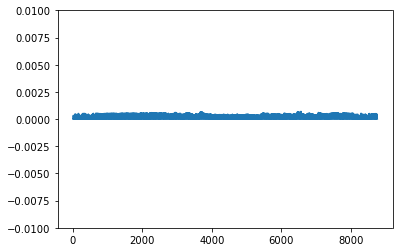

In [10]:
ax=((baseline_totals['scaled']-gross['scaled_res_kwh'].values)/baseline_totals['scaled']).plot()
ax.set_ylim([-0.01,0.01])

(-0.01, 0.01)

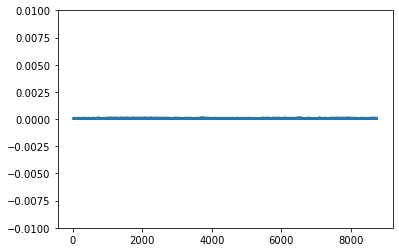

In [11]:
ax=((baseline_totals['scaled'] + com_load['total'] + ind_load['total'] - gross['Raw EIA load/MW']*1000)/
 (gross['Raw EIA load/MW']*1000)).plot()

ax.set_ylim([-0.01,0.01])

In [12]:

cluster_summ.loc[cluster_summ['name'].str.slice(4,6).isin(states)]

name   kwh_ann_tot  \
60   USA_LA_Shreveport.Regional.722480_2016-Mobile_...  1.055801e+08   
61   USA_LA_Shreveport.Regional.722480_2016-Multi-F...  8.050699e+06   
62   USA_LA_Shreveport.Regional.722480_2016-Multi-F...  1.257363e+07   
63   USA_LA_Shreveport.Regional.722480_2016-Single-...  4.048976e+05   
64   USA_LA_Shreveport.Regional.722480_2016-Single-...  6.060436e+08   
..                                                 ...           ...   
175  USA_TX_Wichita.Falls.Sheps.723510_2016-Mobile_...  2.429373e+08   
176  USA_TX_Wichita.Falls.Sheps.723510_2016-Multi-F...  2.671048e+07   
177  USA_TX_Wichita.Falls.Sheps.723510_2016-Multi-F...  5.031077e+07   
178  USA_TX_Wichita.Falls.Sheps.723510_2016-Single-...  3.200647e+05   
179  USA_TX_Wichita.Falls.Sheps.723510_2016-Single-...  1.072188e+10   

     customer_count  cooling_count  heating_count  water_heating_count  \
60          19734.0   19436.288793   15778.693966         15480.982759   
61           1785.0    1743.245614    1336.140351          1294.385965   
62           2979.0    2905.444444    2482.500000          2464.111111   
63             94.0      92.081633      65.224490            61.387755   
64          90111.0   87583.210909   43300.090909         46764.098182   
..              ...            ...            ...                  ...   
175         12070.0   11580.675676    8318.513514          8807.837838   
176          5803.0    5556.063830    3457.106383          3580.574468   
177         11930.0   11488.148148    9720.740741          9057.962963   
178            73.0      69.350000      43.800000            43.800000   
179        103277.0   97977.259211   44708.069737         51910.281579   

     cooking_count  clothes_washer_count  clothes_dryer_count  \
60    15480.982759               19734.0         17522.431034   
61     1357.017544                1785.0          1565.789474   
62     2353.777778                2979.0          2629.611111   
63       70.979592                  94.0            86.326531   
64    60854.181818               90111.0         76816.701818   
..             ...                   ...                  ...   
175    8318.513514               12070.0         10438.918919   
176    3827.510638                5803.0          4691.787234   
177    9941.666667               11930.0         10604.444444   
178      43.800000                  73.0            62.050000   
179   68488.957895              103277.0         87377.777632   

     dishwasher_count  ...                  building_type rate_category  \
60            19734.0  ...                    Mobile Home       nonCare   
61             1785.0  ...  Multi-Family with 2 - 4 Units       nonCare   
62             2979.0  ...     Multi-Family with 5+ Units       nonCare   
63               94.0  ...         Single-Family Attached       nonCare   
64            90111.0  ...         Single-Family Detached       nonCare   
..                ...  ...                            ...           ...   
175           12070.0  ...                    Mobile Home       nonCare   
176            5803.0  ...  Multi-Family with 2 - 4 Units       nonCare   
177           11930.0  ...     Multi-Family with 5+ Units       nonCare   
178              73.0  ...         Single-Family Attached       nonCare   
179          103277.0  ...         Single-Family Detached       nonCare   

     kwh_bin kw_bin hvac_penetration weather_station  sector  \
60   0.0_1.0    any         0.984914          722480     res   
61   0.0_1.0    any         0.976608          722480     res   
62   0.0_1.0    any         0.975309          722480     res   
63   0.0_1.0    any         0.979592          722480     res   
64   0.0_1.0    any         0.971948          722480     res   
..       ...    ...              ...             ...     ...   
175  0.0_1.0    any         0.959459          723510     res   
176  0.0_1.0    any         0.957447          723510     res   
177  0.0_1.0    any         0.962963  

In [13]:
len(cluster_summ)

79

# Sanity check: these numbers below should mostly be order hundreds or thousands, not ones.

In [14]:

drpi

clothes_dryer  clothes_washer      cooling    dishwasher        heating  \
0      33082.722009     2162.445027     0.000000   3674.799582  232224.226104   
1      27909.886905     1181.761161   181.654311   1043.598674  265564.202988   
2      14919.987024      787.831164     0.000000     83.932057  293789.274266   
3      10168.248627     1575.035315     0.000000   1938.178366  327514.670049   
4      20328.404640     1014.805800     0.000000    265.068871  351417.423324   
...             ...             ...          ...           ...            ...   
8755   70520.209588     8415.175962   918.031455  43679.287648  380803.679788   
8756   90267.070973     5049.673941   433.028686  46623.437558  387592.778800   
8757   53463.276030     7029.104698  1331.343062  28647.548830  376427.384021   
8758   78471.650190     2528.704418  2434.879028  15907.623743  163746.566850   
8759   29267.563130     2856.924358     3.482845   5111.209149  186140.518820   

           lighting       cooking         other     plug_loads     pool_pump  \
0      44544.760198  11338.881566  46760.051569  240779.873933   5928.166193   
1      26726.856119  11291.935051  40491.773284  222721.383388   7127.556142   
2      17817.904079   6480.702224  38846.752723  222721.383388   5928.166193   
3      17817.904079   6452.534315  38812.582484  216701.886540   7184.587622   
4      19809.499701  11404.606688  39959.899196  198643.395995  11730.517356   
...             ...           ...           ...            ...           ...   
8755  361098.749061  95135.497369  81433.514630  403306.288838  15088.809213   
8756  327504.078499  55182.730028  83209.343917  427384.276231  12461.903397   
8757  253178.120629  39426.966366  81448.180651  415345.282535  10485.847999   
8758  217343.311039  25462.733043  68000.330543  355150.314051   5928.166193   
8759   89709.831895  17782.026578  58881.310344  300974.842416   5928.166193   

      refrigeration         total  water_heating  
0     126367.503397  7.540935e+05    7228.477644  
1     123208.315812  7.362547e+05    8803.931049  
2     120049.128227  7.317003e+05   10273.321648  
3     116889.940642  7.548699e+05    9812.377212  
4     113730.753057  7.847120e+05   16405.617054  
...             ...           ...            ...  
8755  151641.004077  1.757823e+06  145781.015682  
8756  148481.816492  1.721574e+06  137382.040720  
8757  145322.628907  1.539848e+06  127741.009793  
8758  139004.253737  1.205408e+06  131427.772259  
8759  129526.690982  9.303012e+05  104117.070015  

[8760 rows x 13 columns]

In [15]:
clustername

'USA_TX_Wichita.Falls.Sheps.723510_2016-Single-Family_Detached_0'